<a href="https://colab.research.google.com/github/Ayesha765/pwAssign/blob/main/Logistic_Regression_Practical_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression - Practical Question answers

### 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.datasets import load_iris

# Loading the dataset
df = load_iris()
x = df.data
y = df.target

# Splitting the dataset into Train And test sets.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

# Initializing Logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100)

# Model Training on train data
model.fit(x_train,y_train)


# Prediction on Test Data
y_pred = model.predict(x_test)

# Calulating And Printing the accuracy_score
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test,y_pred)

print(f'LogisticRegression Model Accuracy -{model_accuracy * 100 : .2f} %')
model


LogisticRegression Model Accuracy - 96.67 %


LogisticRegression()

### 2. Write a Python program to apply L1 regularization (Lasso) on a datasetusing LogisticRegression(penalty='l1') and print the model accuracy.

In [ ]:
# Using the Previous data set with L1 regularization

# Initialize the Logistic Regression model with L1 regularization
from sklearn.linear_model import LogisticRegression

model_l1 = LogisticRegression(penalty='l1',max_iter=200,solver='saga')

# Train the model on the training data
model_l1.fit(x_train,y_train)

# Make predictions on the testing data
y_pred = model_l1.predict(x_test)

# printing the accuracy accuracy_score
from sklearn.metrics import accuracy_score

print("Logistic Regression with L1 Regularization Accuracy:", (accuracy_score(y_test,y_pred)*100))

model_l1

Logistic Regression with L1 Regularization Accuracy: 96.66666666666667


LogisticRegression(max_iter=200, penalty='l1', solver='saga')

### 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [ ]:
# # Train Logistic Regression with L2 regularization with the previous splitting
from sklearn.linear_model import LogisticRegression

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)
model_l2.fit(x_train,y_train)

# Prediction test data
y_pred_l2 = model.predict(x_test)

# Printing accuracy_score of model
from sklearn.metrics import accuracy_score

print(f"Model Accuracy with L2 Regularization: {accuracy_score(y_test,y_pred_l2) * 100:.2f}%")

# printing model Coefficients
print('Model Coefficient :')
print(model_l2.coef_)
model_l2


Model Accuracy with L2 Regularization: 96.67%
Model Coefficient :
[[-0.43131307  0.82405288 -2.35098202 -0.96856504]
 [ 0.61791237 -0.42910221 -0.20608792 -0.83080635]
 [-0.1865993  -0.39495068  2.55706995  1.79937139]]


LogisticRegression(max_iter=200)

### 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)


# Train Logistic Regression with Elastic Net regularization
model_el = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model_el.fit(x_train, y_train)

# Predicting on Test Data
y_pred = model_el.predict(x_test)

# Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy * 100:.2f}%")

# Print model coefficients
print("Model Coefficients:")
print(model_el.coef_)

Model Accuracy with Elastic Net Regularization: 100.00%
Model Coefficients:
[[ 0.43549664  1.70997184 -2.48415184 -0.71484616]
 [ 0.          0.          0.         -0.66363241]
 [-1.19129001 -1.30875971  2.36491986  2.16943704]]


### 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = 'ovr')

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score is :",(accuracy_score(y_test,y_pred)*100))

Accuracy Score is : 93.33333333333333


### 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
params = {
    "penalty":("l1","l2","elascticnet"),
    "C":[1,2,3,4,5,15,16]
}

model = GridSearchCV(LogisticRegression(),param_grid = params,cv = 5,verbose = 4,scoring = "accuracy")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("best params",model.best_params_)
print("best score",model.best_score_)
print("best estimator",model.best_estimator_)

print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.917 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.958 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.917 total time=   0.0s
[CV 1/5] END ............C=1, penalty=elascticnet;, score=nan total time=   0.0s
[CV 2/5] END ............C=1, penalty=elascticn

### 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy

In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200, solver='lbfgs')

# Set up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Evaluate model using cross-validation
scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

# Print each fold's accuracy and the average
print("Accuracy for each fold:", scores)
print(f"Average Accuracy: {np.mean(scores) * 100:.2f}%")


Accuracy for each fold: [0.96666667 1.         0.93333333 1.         0.9       ]
Average Accuracy: 96.00%


### 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
x = df.iloc[:,:-1]
y = df["target"]
y.unique()

array([0, 1])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 1)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(f"accuracy of the model is {accuracy_score(y_test,y_pred)*100:.2f}%")

accuracy of the model is 81.49%


### 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {"penalty":["l1","l2","elasticnet","none"],
          "C":[12,2,34,56,78],
          "solver":("lbfgs","liblinear","newton-cg")}
model = RandomizedSearchCV(LogisticRegression(),param_distributions = params,cv = 5,n_iter = 5,verbose = 4,random_state = 1)
model


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [12, 2, 34, 56, 78],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ('lbfgs', 'liblinear',
                                                   'newton-cg')},
                   random_state=1, verbose=4)

In [ ]:
model.fit(x_train,y_train)
y_predict = model.best_estimator_.predict(x_test)
print('\nAccuracy Score :', (accuracy_score(y_test,y_predict))*100)

print("Best Parameter:",model.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....C=56, penalty=l2, solver=lbfgs;, score=0.840 total time=   0.2s
[CV 2/5] END ....C=56, penalty=l2, solver=lbfgs;, score=0.861 total time=   0.2s
[CV 3/5] END ....C=56, penalty=l2, solver=lbfgs;, score=0.881 total time=   0.1s
[CV 4/5] END ....C=56, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.2s
[CV 5/5] END ....C=56, penalty=l2, solver=lbfgs;, score=0.818 total time=   0.0s
[CV 1/5] END C=56, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 2/5] END C=56, penalty=l2, solver=newton-cg;, score=0.868 total time=   0.0s
[CV 3/5] END C=56, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=56, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.1s
[CV 5/5] END C=56, penalty=l2, solver=newton-cg;, score=0.811 total time=   0.1s
[CV 1/5] END ..C=12, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ..C=12, penalty=l1, solver=newton-cg

### 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a multiclass dataset (Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Logistic Regression model with One-vs-One (OvO) strategy
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train, y_train)

# Make predictions
y_pred = ovo_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Logistic Regression Model Accuracy: {accuracy:.2f}")

One-vs-One Logistic Regression Model Accuracy: 0.97


### 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

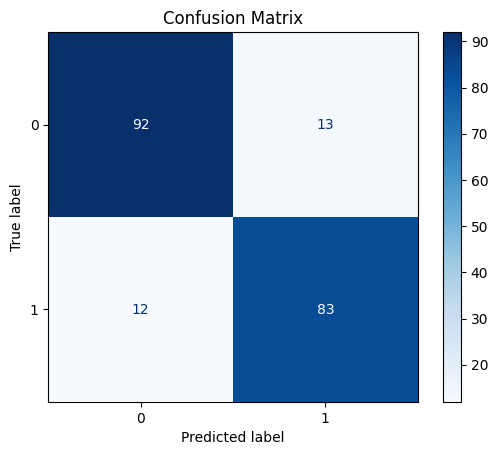

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and split dataset
x, y = make_classification(n_samples=1000, n_features=10, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,Recall, and F1-Score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.86
Recall: 0.87
F1-Score: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       105
           1       0.86      0.87      0.87        95

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200



### 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70       183
           1       0.12      0.65      0.20        17

    accuracy                           0.56       200
   macro avg       0.53      0.60      0.45       200
weighted avg       0.87      0.56      0.66       200



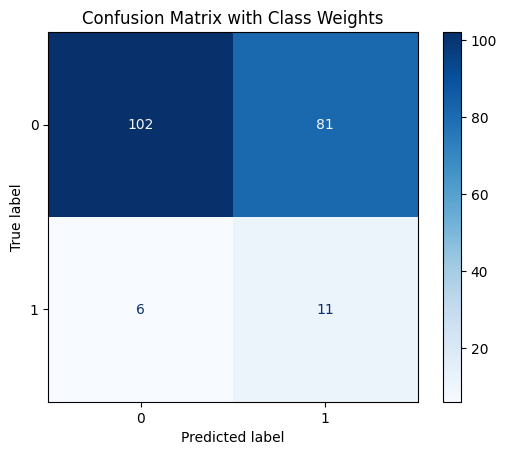

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=1
)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)

# Train Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Class Weights')
plt.show()




###  14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset from seaborn
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop rows where 'embark_town' or 'deck' is missing (optional for simplicity)
titanic.dropna(subset=['embark_town', 'deck'], inplace=True)

# Select features and target variable
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
y = titanic['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.75      0.81      0.78        26

    accuracy                           0.71        41
   macro avg       0.68      0.67      0.67        41
weighted avg       0.70      0.71      0.70        41



### 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling .


In [ ]:
x,y = make_classification(n_samples = 1000,n_features = 10,n_classes = 2,random_state = 1,n_redundant = 5,n_informative = 5)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

y_pred = lg_model.predict(x_test)
print("without the Scaling")
print(accuracy_score(y_test,y_pred))
print()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

y_pred = lg_model.predict(x_test)
print("with the Scaling")
print(accuracy_score(y_test,y_pred))
print()

without the Scaling
0.825

with the Scaling
0.825



### 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

In [ ]:
x,y = make_classification(n_samples = 1000,n_features = 10,n_classes = 2,random_state = 1,n_redundant = 5,n_informative = 5)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

y_pred = lg_model.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve,auc
fpr,tpr,threshlod = roc_curve(y_test,y_pred)
auc = (fpr,tpr)
np.mean(auc)

np.float64(0.5926985295210907)

### 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

In [ ]:
x,y = make_classification(n_samples = 1000,n_features = 10,n_classes = 2,random_state = 1,n_redundant = 5,n_informative = 5)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)
lg_model = LogisticRegression(C = 0.5)
lg_model.fit(x_train,y_train)
y_pred = lg_model.predict(x_test)
print("Acuracy Score :",accuracy_score(y_test,y_pred))

Acuracy Score : 0.825


### 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients

In [ ]:
# Generate and split dataset
x, y = make_classification(n_samples=1000, n_features=10, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Display feature importance
importance = np.abs(model.coef_[0])
for i, score in enumerate(importance, 1):
    print(f"Feature {i}: {score:.4f}")


Feature 1: 0.6678
Feature 2: 0.0019
Feature 3: 0.1117
Feature 4: 1.4756
Feature 5: 0.5389
Feature 6: 0.2561
Feature 7: 0.0321
Feature 8: 0.0627
Feature 9: 0.0046
Feature 10: 0.0376


### 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

In [ ]:
from sklearn.metrics import cohen_kappa_score
# Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict and evaluate using Cohen's Kappa Score
y_pred = model.predict(x_test)
kappa_score = cohen_kappa_score(y_test, y_pred)

print(f"Cohen's Kappa Score: {kappa_score:.4f}")

Cohen's Kappa Score: 0.7495


### 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

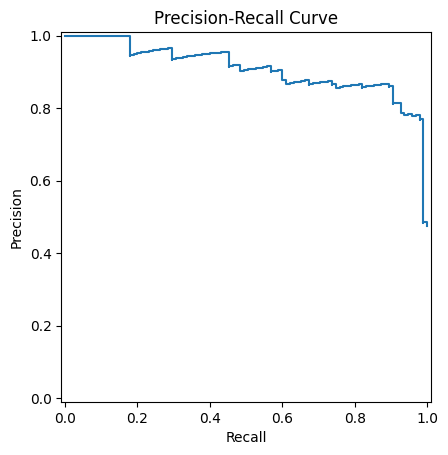

In [ ]:

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Generate and split dataset
x, y = make_classification(n_samples=1000, n_features=10, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

# Get predicted probabilities
y_scores = model.predict_proba(x_test)[:, 1]

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Visualize Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()


### 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

In [ ]:
solver = ["liblinear","saga","lbfgs"]
evaluate = {}
for i in solver:
    model = LogisticRegression(solver = i,max_iter = 1000)
    model.fit(x_train,y_train)
    accuracy = accuracy_score(y_test,model.predict(x_test))
    evaluate[f"accuracy of {i}"] = accuracy
evaluate

{'accuracy of liblinear': 0.875,
 'accuracy of saga': 0.875,
 'accuracy of lbfgs': 0.875}

### 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

In [ ]:
from sklearn.metrics import matthews_corrcoef
print("mathews_corrcoef is ",matthews_corrcoef(y_test,model.predict(x_test)))

mathews_corrcoef is  0.7495366261300491


### 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("accuracy of the model without the standardized", accuracy_score(y_test,y_pred))
print()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("accuracy of the model with the standardized", accuracy_score(y_test,y_pred))
print()

accuracy of the model without the standardized 0.875

accuracy of the model with the standardized 0.875



### 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

In [ ]:

C = [1,2,0.5,3.4,5,6,7]
def Cross_val(x_train,y_train,C):
    import numpy as np
    from sklearn.model_selection import KFold,cross_val_score
    cv = KFold(n_splits = 5)
    for i in C:
        model = LogisticRegression(C = i)
        cv_score = cross_val_score(model,x_train,y_train,cv = cv)
        print("cross val score of c = ",i," is ",np.mean(cv_score))
        print()
Cross_val(x_train,y_train,C)

cross val score of c =  1  is  0.845

cross val score of c =  2  is  0.84375

cross val score of c =  0.5  is  0.845

cross val score of c =  3.4  is  0.8424999999999999

cross val score of c =  5  is  0.8424999999999999

cross val score of c =  6  is  0.8424999999999999

cross val score of c =  7  is  0.8424999999999999



### 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

In [ ]:
import joblib

joblib.dump(lg_model,"lg_model.joblib")
load_model = joblib.load("lg_model.joblib")
y_prd = load_model.predict(x_test)

print("accuracy is ",accuracy_score(y_test,y_pred))

accuracy is  0.875
